# Analyzing Portfolio Risk and Return

### Import the Data

In [2]:
# Import the required libraries and dependencies
# YOUR CODE HERE
import pandas as pd
from pathlib import Path
import numpy as np
import sys
sys
from yahoo_api import *
# from yahoo_api import yahoo_api_call


%matplotlib inline


In [3]:

# 'BTC-USD', 'ETH-USD', 'T', 'XOM', 'AAPL', 'MSFT', 'SQ', 'AGG', 'SPY'
tickers_index=['BTC-USD','ETH-USD','SQ','SHOP','TSLA','NVDA','AAPL','GOOG','MSFT','SPY','AGG']
historical_data_df = historical_prices(tickers_index)


Waiting 100 seconds to avoid overloading the API


In [4]:
historical_data_df

BTC-USD                                             ETH-USD  \
                open      high       low     close       volume     open   
date                                                                       
11-08-2017   7446.83   7446.83   7101.52   7143.58   3226249984   308.64   
11-09-2017   7173.73      7312   6436.87   6618.14   5208249856   320.67   
11-10-2017   6618.61   6873.15   6204.22    6357.6   4908680192   298.59   
11-13-2017   6561.48   6764.98   6461.75   6635.75   3197110016   316.76   
11-14-2017   6634.76   7342.25   6634.76   7315.54   4200880128   337.96   
...              ...       ...       ...       ...          ...      ...   
01-23-2023  22929.63  23134.01  22549.74  22636.47  26405069715  1627.85   
01-24-2023  22639.27   23722.1  22406.08  23117.86  30685366709  1556.81   
01-25-2023  23108.96  23237.08  22911.37  23032.78  26357839322  1611.08   
01-26-2023  23030.72  23417.72  22654.59  23078.73  25383335641  1603.08   
01-27-2023  23079.96   23165.9  22908.85  23031.09  14712928379  1598.13   

                                                    ...     SPY          \
               high      low    close       volume  ...    open    high   
date                                                ...                   
11-08-2017   329.45   307.06   320.88    893249984  ...  258.47  259.22   
11-09-2017   324.72   294.54   299.25    885985984  ...  257.73  258.39   
11-10-2017   319.45   298.19   314.68    842300992  ...  257.73  258.29   
11-13-2017   340.18   316.76   337.63   1069680000  ...  257.31  258.59   
11-14-2017   340.91   329.81   333.36    722665984  ...  257.41  257.85   
...             ...      ...      ...          ...  ...     ...     ...   
01-23-2023  1639.72  1551.39   1556.6   8180274691  ...  396.72  402.65   
01-24-2023  1632.24   1530.8  1611.71  10598973448  ...  398.88  401.15   
01-25-2023   1626.2   1586.6  1603.11   8395315241  ...  395.95   400.7   
01-26-2023     1617  1565.24  1598.16   8124465373  ...  403.13  404.92   
01-27-2023   1604.7  1565.39  1572.44   5803653357  ...  403.66  408.16   

                                         AGG                                   
               low   close    volume    open    high     low   close   volume  
date                                                                           
11-08-2017  258.15  259.11  50469600  109.54   109.6  109.46  109.51  2742600  
11-09-2017  256.36  258.17  95085500  109.39  109.46   109.3  109.43  2479800  
11-10-2017  257.37  258.09  59984700  109.06  109.15  108.97  108.99  1751100  
11-13-2017  257.27  258.33  50228600  109.11  109.11  108.96  108.99  1891600  
11-14-2017  256.52  257.73  61315200  109.01  109.12     109   109.1  2799900  
...            ...     ...       ...     ...     ...     ...     ...      ...  
01-23-2023  395.72  400.63  84178800    99.8  100.06   99.78   99.84  6573200  
01-24-2023  397.64   400.2  59524900   99.84  100.32   99.68  100.28  6538600  
01-25-2023  393.56  400.35  84800300  100.26  100.47   100.1   100.4  5431000  
01-26-2023  400.03  404.75  72287400  100.33  100.46  100.07  100.23  5399100  
01-27-2023  403.44  405.68  68280700   99.96  100.14   99.91  100.08  5123100  

[1313 rows x 55 columns]

In [5]:
close_price = pd.DataFrame()
for i in [ticker[0] for ticker in historical_data_df]:
    close_price[i] = historical_data_df[i]['close']
print(close_price)


             BTC-USD  ETH-USD     SQ   SHOP    TSLA    NVDA    AAPL    GOOG  \
date                                                                          
11-08-2017   7143.58   320.88  36.71   9.94   20.29   52.29   44.06   51.99   
11-09-2017   6618.14   299.25  37.96    9.7    20.2   51.33   43.97   51.56   
11-10-2017    6357.6   314.68  39.21     10    20.2   54.03   43.67    51.4   
11-13-2017   6635.75   337.63  39.98   9.88   21.03   53.16   43.49   51.29   
11-14-2017   7315.54   333.36  39.74    9.9   20.58   53.54   42.83    51.3   
...              ...      ...    ...    ...     ...     ...     ...     ...   
01-23-2023  22636.47   1556.6  81.66  44.04  143.75  191.93  141.11  101.21   
01-24-2023  23117.86  1611.71  80.79  42.69  143.89  192.65  142.53   99.21   
01-25-2023  23032.78  1603.11  80.77  47.33  144.43  193.23  141.86   96.73   
01-26-2023  23078.73  1598.16  81.19  48.33  160.27  198.02  143.96   99.16   
01-27-2023  23031.09  1572.44  83.83  50.08   177.9 

In [6]:
close_price_adj = close_price.dropna()
close_price_adj

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
11-08-2017,7143.58,320.88,36.71,9.94,20.29,52.29,44.06,51.99,84.56,259.11,109.51
11-09-2017,6618.14,299.25,37.96,9.7,20.2,51.33,43.97,51.56,84.09,258.17,109.43
11-10-2017,6357.6,314.68,39.21,10,20.2,54.03,43.67,51.4,83.87,258.09,108.99
11-13-2017,6635.75,337.63,39.98,9.88,21.03,53.16,43.49,51.29,83.93,258.33,108.99
11-14-2017,7315.54,333.36,39.74,9.9,20.58,53.54,42.83,51.3,84.05,257.73,109.1
...,...,...,...,...,...,...,...,...,...,...,...
01-23-2023,22636.47,1556.6,81.66,44.04,143.75,191.93,141.11,101.21,242.58,400.63,99.84
01-24-2023,23117.86,1611.71,80.79,42.69,143.89,192.65,142.53,99.21,242.04,400.2,100.28
01-25-2023,23032.78,1603.11,80.77,47.33,144.43,193.23,141.86,96.73,240.61,400.35,100.4


In [7]:
close_one_year = close_price_adj.loc['11-08-2017':'11-08-2018']
print(close_one_year)

            BTC-USD ETH-USD     SQ   SHOP   TSLA   NVDA   AAPL   GOOG    MSFT  \
date                                                                            
11-08-2017  7143.58  320.88  36.71   9.94  20.29  52.29  44.06  51.99   84.56   
11-09-2017  6618.14  299.25  37.96    9.7   20.2  51.33  43.97  51.56   84.09   
11-10-2017   6357.6  314.68  39.21     10   20.2  54.03  43.67   51.4   83.87   
11-13-2017  6635.75  337.63  39.98   9.88  21.03  53.16  43.49  51.29   83.93   
11-14-2017  7315.54  333.36  39.74    9.9  20.58  53.54  42.83   51.3   84.05   
...             ...     ...    ...    ...    ...    ...    ...    ...     ...   
11-02-2018  6361.26  200.19  77.76  14.56  23.09  53.73  51.87  52.89  106.16   
11-05-2018  6461.01  218.45  75.01   14.1  22.76  52.94   50.4     52  107.51   
11-06-2018  6530.14  217.18  77.31  14.09  22.74  52.76  50.94  52.79  107.72   
11-07-2018  6453.72  212.23  82.69  14.82  23.21  53.45  52.49  54.67  111.96   
11-08-2018  6385.62  210.07 

In [8]:
close_three_years = close_price_adj.loc['11-08-2017':'10-08-2020']
print(close_three_years)

             BTC-USD ETH-USD      SQ    SHOP    TSLA    NVDA    AAPL   GOOG  \
date                                                                          
11-08-2017   7143.58  320.88   36.71    9.94   20.29   52.29   44.06  51.99   
11-09-2017   6618.14  299.25   37.96     9.7    20.2   51.33   43.97  51.56   
11-10-2017    6357.6  314.68   39.21      10    20.2   54.03   43.67   51.4   
11-13-2017   6635.75  337.63   39.98    9.88   21.03   53.16   43.49  51.29   
11-14-2017   7315.54  333.36   39.74     9.9   20.58   53.54   42.83   51.3   
...              ...     ...     ...     ...     ...     ...     ...    ...   
10-02-2020  10549.33  346.52  169.61   102.9  138.36  130.62  113.02  72.92   
10-05-2020  10604.41  340.82  180.92  106.55  141.89  136.43   116.5   74.3   
10-06-2020  10668.97  341.81  175.34  104.13  137.99  137.37  113.16  72.67   
10-07-2020  10915.69  350.77  180.18  107.34  141.77  139.64  115.08  73.01   
10-08-2020  11064.46  365.59   183.5  106.92  141.97

In [9]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns = close_price_adj.pct_change().dropna()
daily_returns.head()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
11-09-2017,-0.073554,-0.067408,0.034051,-0.024145,-0.004436,-0.018359,-0.002043,-0.008271,-0.005558,-0.003628,-0.000731
11-10-2017,-0.039368,0.051562,0.032929,0.030928,0.000000,0.052601,-0.006823,-0.003103,-0.002616,-0.000310,-0.004021
11-13-2017,0.043751,0.072931,0.019638,-0.012000,0.041089,-0.016102,-0.004122,-0.002140,0.000715,0.000930,0.000000
11-14-2017,0.102444,-0.012647,-0.006003,0.002024,-0.021398,0.007148,-0.015176,0.000195,0.001430,-0.002323,0.001009
11-15-2017,0.076023,-0.007319,0.023150,-0.010101,0.008260,-0.019612,-0.013075,-0.004873,-0.012731,-0.005005,0.001925


In [10]:
daily_returns_one_year = close_one_year.pct_change().dropna()
daily_returns_three_years = close_three_years.pct_change().dropna()
print(daily_returns_one_year)
print(daily_returns_three_years)

             BTC-USD   ETH-USD        SQ      SHOP      TSLA      NVDA  \
date                                                                     
11-09-2017 -0.073554 -0.067408  0.034051 -0.024145 -0.004436 -0.018359   
11-10-2017 -0.039368  0.051562  0.032929  0.030928  0.000000  0.052601   
11-13-2017  0.043751  0.072931  0.019638 -0.012000  0.041089 -0.016102   
11-14-2017  0.102444 -0.012647 -0.006003  0.002024 -0.021398  0.007148   
11-15-2017  0.076023 -0.007319  0.023150 -0.010101  0.008260 -0.019612   
...              ...       ...       ...       ...       ...       ...   
11-02-2018 -0.004255 -0.002193  0.013292  0.008310  0.006100 -0.014671   
11-05-2018  0.015681  0.091213 -0.035365 -0.031593 -0.014292 -0.014703   
11-06-2018  0.010700 -0.005814  0.030663 -0.000709 -0.000879 -0.003400   
11-07-2018 -0.011703 -0.022792  0.069590  0.051810  0.020668  0.013078   
11-08-2018 -0.010552 -0.010178 -0.090216  0.008772  0.009479 -0.036483   

                AAPL      GOOG      M

---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

<AxesSubplot:title={'center':'Daily Returns for the 11 portfolios'}, xlabel='date'>

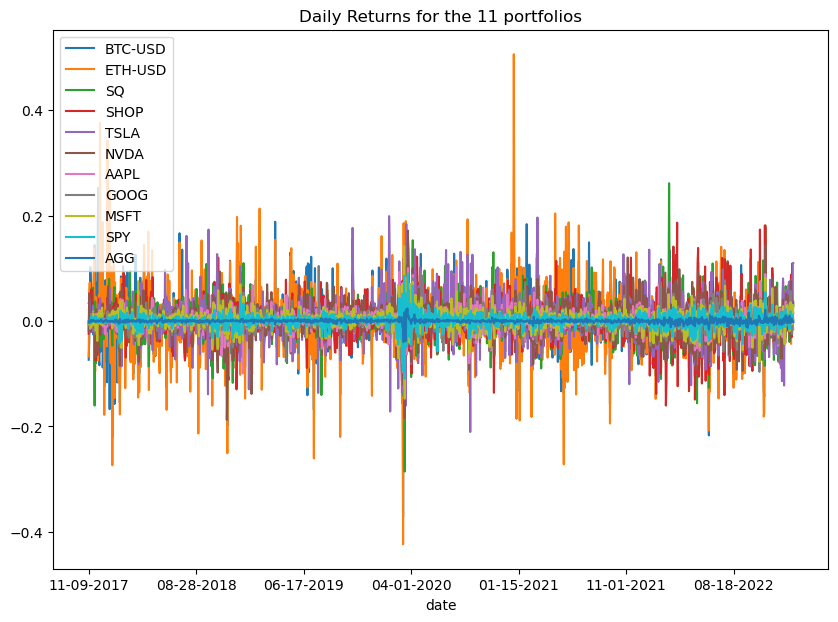

In [11]:
daily_returns.plot(figsize = (10,7), title = "Daily Returns for the 11 portfolios")

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
11-09-2017,0.926446,0.932592,1.034051,0.975855,0.995564,0.981641,0.997957,0.991729,0.994442,0.996372,0.999269
11-10-2017,0.889974,0.980678,1.068101,1.006036,0.995564,1.033276,0.991148,0.988652,0.991840,0.996063,0.995252
11-13-2017,0.928911,1.052200,1.089077,0.993964,1.036471,1.016638,0.987063,0.986536,0.992550,0.996990,0.995252
11-14-2017,1.024072,1.038893,1.082539,0.995976,1.014293,1.023905,0.972084,0.986728,0.993969,0.994674,0.996256
11-15-2017,1.101925,1.031289,1.107600,0.985915,1.022671,1.003825,0.959374,0.981920,0.981315,0.989695,0.998174


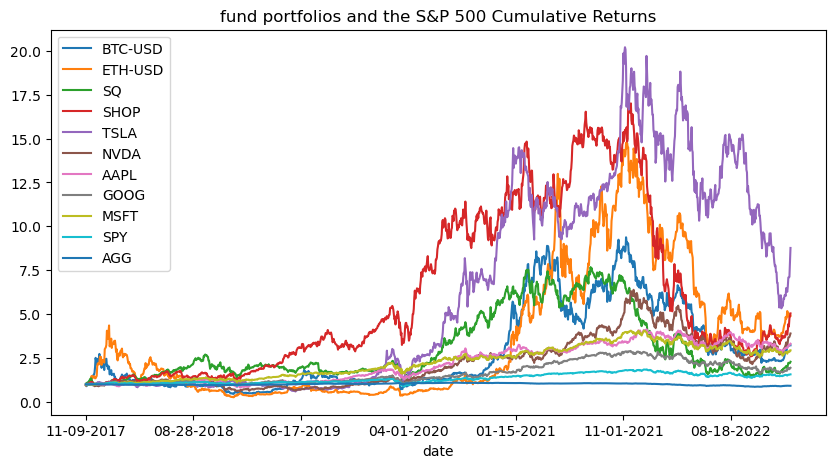

In [12]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(10,5), title="fund portfolios and the S&P 500 Cumulative Returns")
cumulative_returns.head()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
11-09-2017,0.926446,0.932592,1.034051,0.975855,0.995564,0.981641,0.997957,0.991729,0.994442,0.996372,0.999269
11-10-2017,0.889974,0.980678,1.068101,1.006036,0.995564,1.033276,0.991148,0.988652,0.991840,0.996063,0.995252
11-13-2017,0.928911,1.052200,1.089077,0.993964,1.036471,1.016638,0.987063,0.986536,0.992550,0.996990,0.995252
11-14-2017,1.024072,1.038893,1.082539,0.995976,1.014293,1.023905,0.972084,0.986728,0.993969,0.994674,0.996256
11-15-2017,1.101925,1.031289,1.107600,0.985915,1.022671,1.003825,0.959374,0.981920,0.981315,0.989695,0.998174


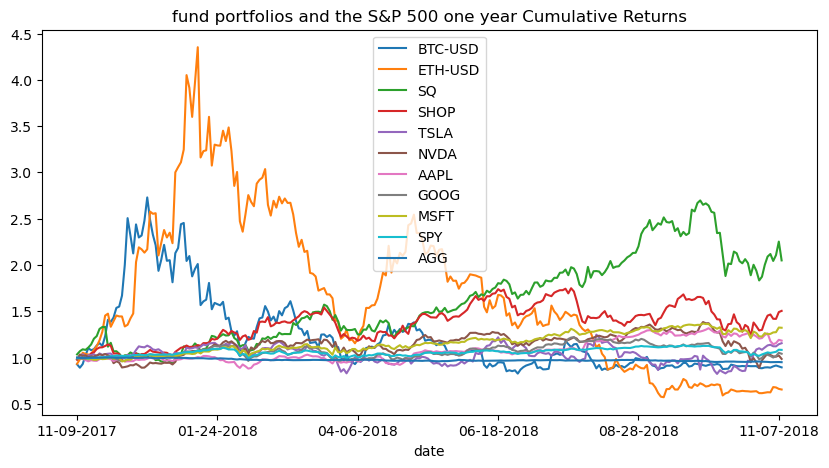

In [13]:
cumulative_returns_one_year = (1 + daily_returns_one_year).cumprod()
cumulative_returns_one_year.plot(figsize=(10,5), title="fund portfolios and the S&P 500 one year Cumulative Returns")
cumulative_returns_one_year.head()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
11-09-2017,0.926446,0.932592,1.034051,0.975855,0.995564,0.981641,0.997957,0.991729,0.994442,0.996372,0.999269
11-10-2017,0.889974,0.980678,1.068101,1.006036,0.995564,1.033276,0.991148,0.988652,0.991840,0.996063,0.995252
11-13-2017,0.928911,1.052200,1.089077,0.993964,1.036471,1.016638,0.987063,0.986536,0.992550,0.996990,0.995252
11-14-2017,1.024072,1.038893,1.082539,0.995976,1.014293,1.023905,0.972084,0.986728,0.993969,0.994674,0.996256
11-15-2017,1.101925,1.031289,1.107600,0.985915,1.022671,1.003825,0.959374,0.981920,0.981315,0.989695,0.998174


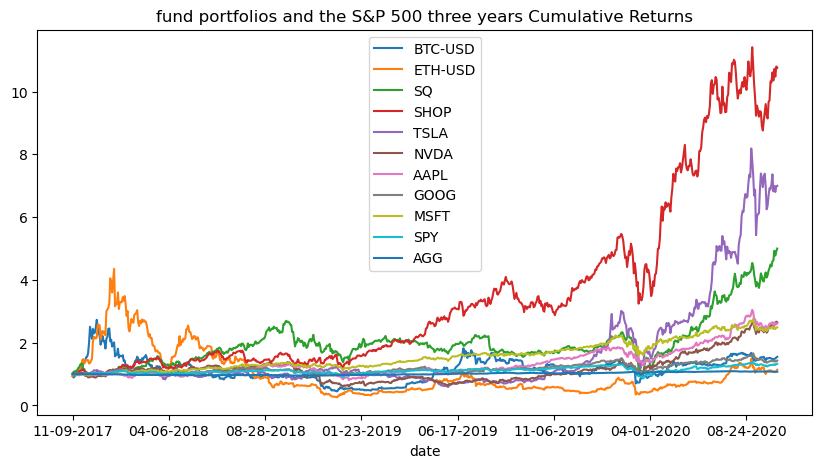

In [14]:
cumulative_returns_three_year = (1 + daily_returns_three_years).cumprod()
cumulative_returns_three_year.plot(figsize=(10,5), title="fund portfolios and the S&P 500 three years Cumulative Returns")
cumulative_returns_three_year.head()

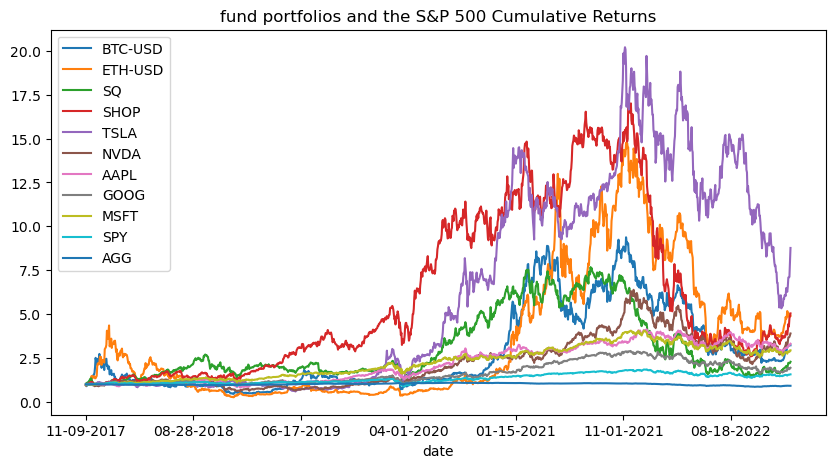

In [15]:
ax = cumulative_returns.plot(figsize=(10,5), title="fund portfolios and the S&P 500 Cumulative Returns")

Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** 

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

<AxesSubplot:title={'center':'fund portfolios volatility'}>

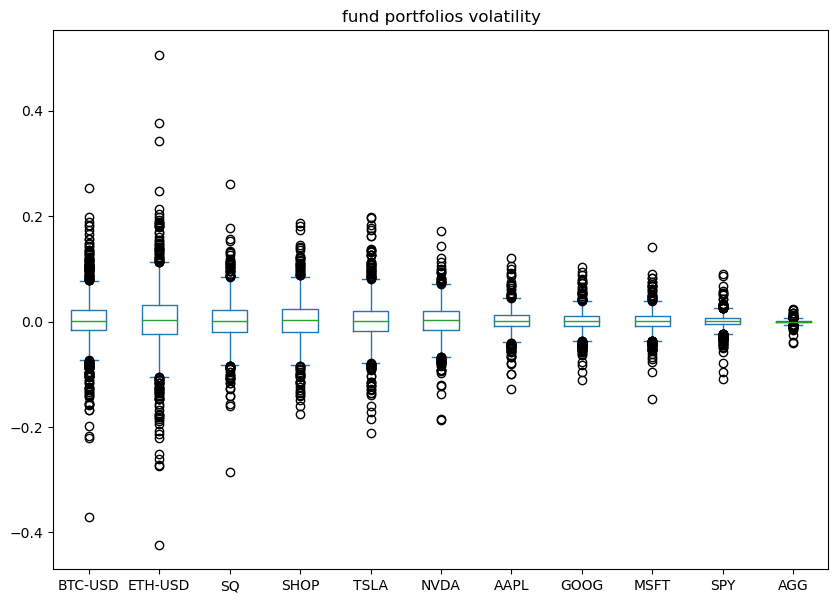

In [16]:
#box plots to visualize the volatility of the 4 funds and the S&P 500 
daily_returns.plot(kind="box", figsize=(10,7), title="fund portfolios volatility")


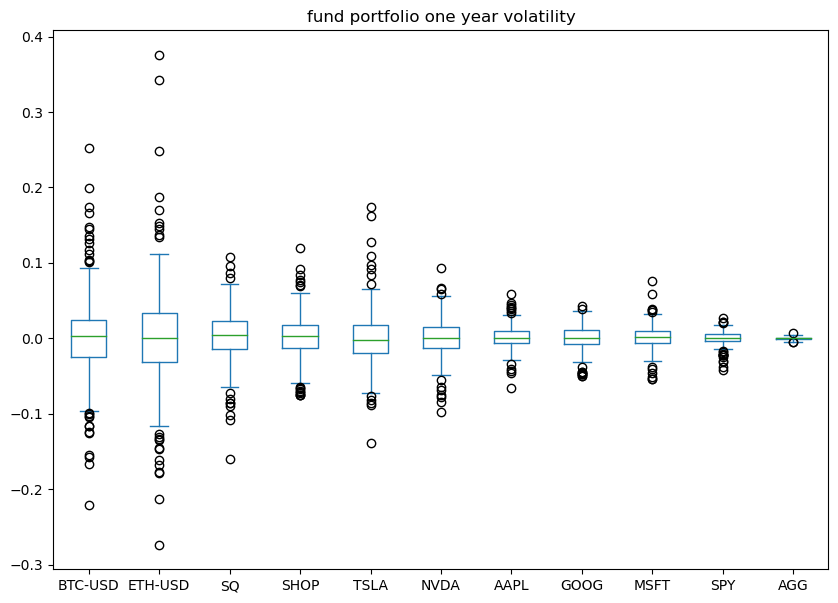

In [17]:
volatility_one_year = daily_returns_one_year.plot(kind="box", figsize=(10,7), title="fund portfolio one year volatility")

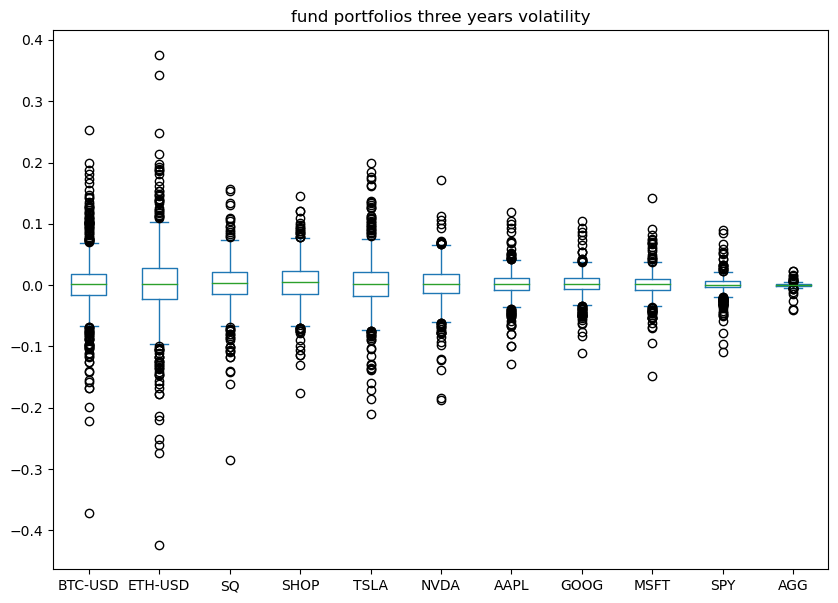

In [18]:
volatility_three_years = daily_returns_three_years.plot(kind="box", figsize=(10,7), title="fund portfolios three years volatility")

Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** 

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [19]:
standards_deviation = daily_returns.std()
standards_deviation.sort_values()

AGG        0.003612
SPY        0.013408
MSFT       0.019382
GOOG       0.019561
AAPL       0.020821
NVDA       0.032498
SHOP       0.040060
SQ         0.040718
TSLA       0.041120
BTC-USD    0.048248
ETH-USD    0.062359
dtype: float64

In [20]:
sd_one_year = daily_returns_one_year.std()
sd_one_year.sort_values()

AGG        0.001715
SPY        0.009017
AAPL       0.015415
MSFT       0.015865
GOOG       0.016110
NVDA       0.025755
SHOP       0.030579
TSLA       0.035165
SQ         0.035232
BTC-USD    0.058427
ETH-USD    0.072776
dtype: float64

In [21]:
sd_three_years = daily_returns_three_years.std()
sd_three_years.sort_values()

AGG        0.003461
SPY        0.014420
GOOG       0.019156
MSFT       0.020271
AAPL       0.021757
NVDA       0.031519
SHOP       0.034547
SQ         0.037268
TSLA       0.042633
BTC-USD    0.050381
ETH-USD    0.063218
dtype: float64

In [22]:
#annualized standard deviation (252 trading days) 
annualized_standards_deviation = standards_deviation * np.sqrt(252)
annualized_standards_deviation.sort_values()


AGG        0.057346
SPY        0.212843
MSFT       0.307684
GOOG       0.310526
AAPL       0.330531
NVDA       0.515889
SHOP       0.635932
SQ         0.646373
TSLA       0.652765
BTC-USD    0.765912
ETH-USD    0.989911
dtype: float64

In [23]:
annualized_sd_one_year = sd_one_year * np.sqrt(252)
annualized_sd_one_year

BTC-USD    0.927507
ETH-USD    1.155286
SQ         0.559297
SHOP       0.485424
TSLA       0.558233
NVDA       0.408841
AAPL       0.244701
GOOG       0.255740
MSFT       0.251847
SPY        0.143144
AGG        0.027231
dtype: float64

In [24]:
annualized_sd_three_years = sd_three_years * np.sqrt(252)
annualized_sd_three_years

BTC-USD    0.799779
ETH-USD    1.003549
SQ         0.591605
SHOP       0.548410
TSLA       0.676774
NVDA       0.500350
AAPL       0.345376
GOOG       0.304094
MSFT       0.321790
SPY        0.228911
AGG        0.054949
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling std of portfolio'}, xlabel='date'>

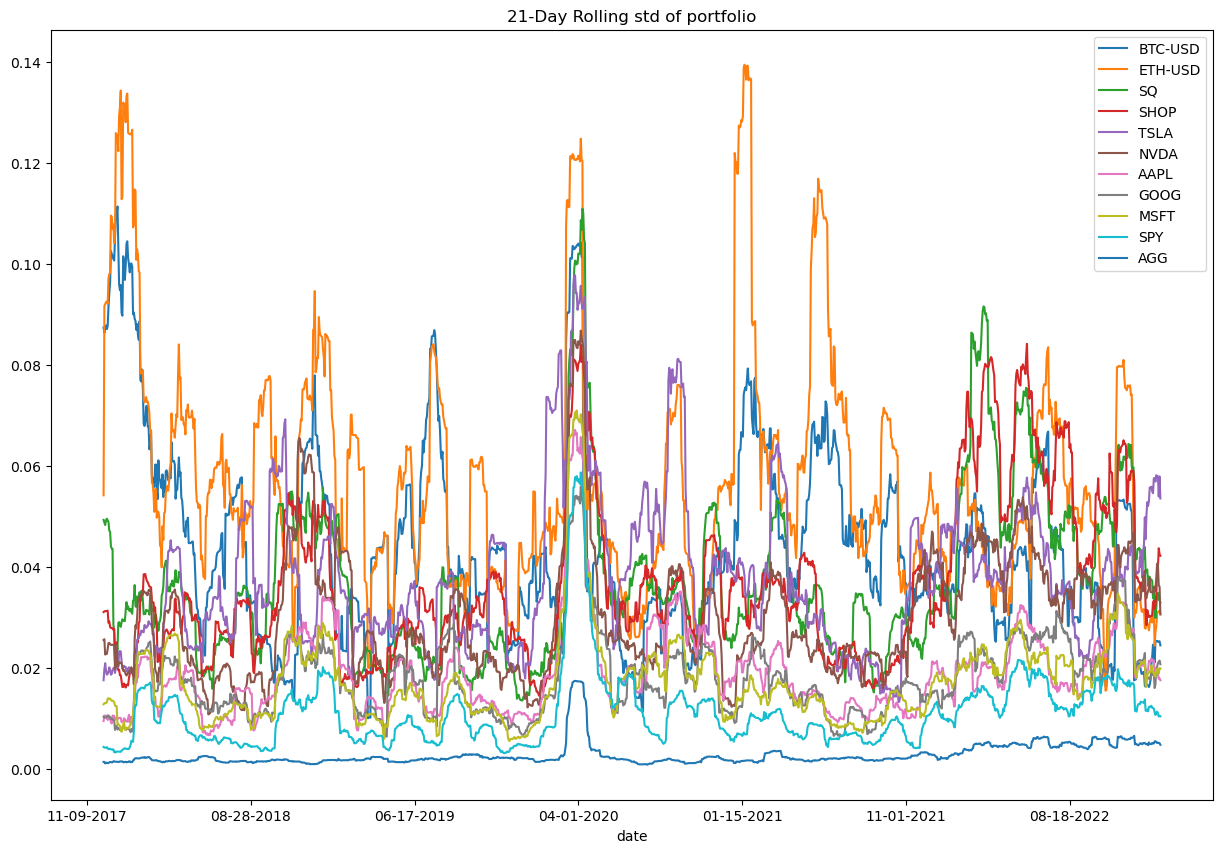

In [25]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# We plot the rolling standard deviation of the  portfolios and the S&P 500
daily_returns.rolling(window=21).std().plot(figsize=(15,10), title="21-Day Rolling std of portfolio")

Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** 

Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2**

**Question 3** Based on the rolling standard deviations of the fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** 

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [26]:
#The annual average return data for the for fund portfolios and the S&P 500
# Using 252 as the number of trading days in the year
trading_days = 252
annual_average_returns = daily_returns.mean() * trading_days
annual_average_returns.sort_values

<bound method Series.sort_values of BTC-USD    0.522695
ETH-USD    0.799057
SQ         0.368518
SHOP       0.512922
TSLA       0.629684
NVDA       0.395086
AAPL       0.284753
GOOG       0.175246
MSFT       0.254221
SPY        0.108883
AGG       -0.015645
dtype: float64>

In [27]:
trading_days = 252
one_year_annual_average_returns = daily_returns_one_year.mean() * trading_days
one_year_annual_average_returns.sort_values

<bound method Series.sort_values of BTC-USD    0.314834
ETH-USD    0.231889
SQ         0.876582
SHOP       0.525645
TSLA       0.296436
NVDA       0.068585
AAPL       0.197889
GOOG       0.072939
MSFT       0.310531
SPY        0.089600
AGG       -0.051154
dtype: float64>

In [28]:
trading_days = 252
three_years_annual_average_returns = daily_returns_three_years.mean() * trading_days
three_years_annual_average_returns.sort_values

<bound method Series.sort_values of BTC-USD    0.476745
ETH-USD    0.559551
SQ         0.732784
SHOP       0.968566
TSLA       0.897825
NVDA       0.461697
AAPL       0.389668
GOOG       0.169076
MSFT       0.365657
SPY        0.123599
AGG        0.026287
dtype: float64>

In [29]:
# the annualized Sharpe Ratios for each of the  portfolios and the S&P 500.
annualized_sharpe_ratio = annual_average_returns/ annualized_standards_deviation
annualized_sharpe_ratio.sort_values()

AGG       -0.272816
SPY        0.511565
GOOG       0.564353
SQ         0.570132
BTC-USD    0.682448
NVDA       0.765836
SHOP       0.806566
ETH-USD    0.807201
MSFT       0.826240
AAPL       0.861501
TSLA       0.964641
dtype: float64

In [30]:
one_year_sharpe_ratio = one_year_annual_average_returns/ sd_one_year
one_year_sharpe_ratio.sort_values()

AGG       -29.820519
NVDA        2.663022
ETH-USD     3.186326
GOOG        4.527508
BTC-USD     5.388454
TSLA        8.429774
SPY         9.936573
AAPL       12.837666
SHOP       17.189851
MSFT       19.573507
SQ         24.879973
dtype: float64

In [31]:
three_years_sharpe_ratio = three_years_annual_average_returns/ sd_three_years
three_years_sharpe_ratio.sort_values()

AGG         7.594343
SPY         8.571286
GOOG        8.826195
ETH-USD     8.851195
BTC-USD     9.462726
NVDA       14.648175
AAPL       17.910277
MSFT       18.038551
SQ         19.662738
TSLA       21.059515
SHOP       28.036521
dtype: float64

In [ ]:
# Visualize the Sharpe ratios as a bar chart
annualized_sharpe_ratio.plot(kind="bar")

: 

<AxesSubplot:>

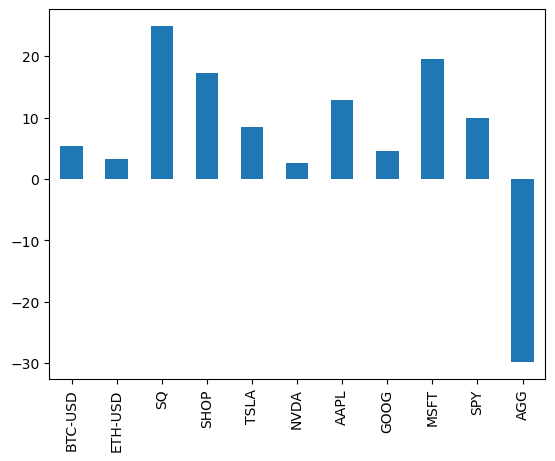

In [32]:
one_year_sharpe_ratio.plot(kind="bar")

<AxesSubplot:>

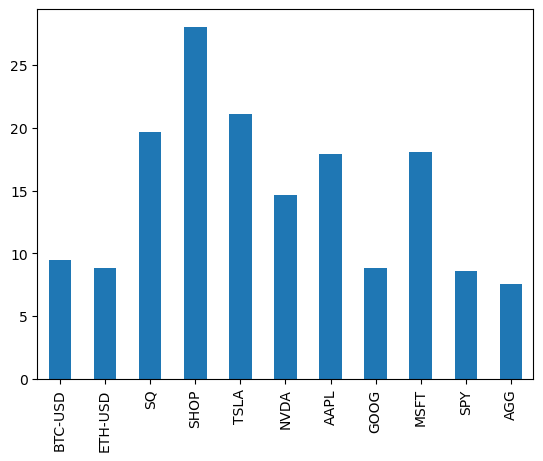

In [33]:
three_years_sharpe_ratio.plot(kind="bar")

**Question** Which of the portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

In [34]:
#The variance of the S&P 500 using a rolling 60-day window.
data_variance = daily_returns.rolling(window=60).var()
data_variance.tail()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
01-23-2023,0.001348,0.002668,0.002290,0.002355,0.002141,0.001549,0.000630,0.000775,0.000622,0.000197,0.000029
01-24-2023,0.001343,0.002666,0.002293,0.002361,0.002138,0.001529,0.000626,0.000623,0.000520,0.000196,0.000029
01-25-2023,0.001341,0.002656,0.002293,0.002067,0.002138,0.001525,0.000611,0.000624,0.000514,0.000195,0.000029
01-26-2023,0.001340,0.002630,0.002291,0.002070,0.002356,0.001499,0.000517,0.000604,0.000503,0.000188,0.000029
01-27-2023,0.001334,0.002623,0.002291,0.002084,0.002575,0.001490,0.000517,0.000600,0.000498,0.000187,0.000029


In [35]:
one_year_variance = daily_returns_one_year.rolling(window=60).var()
one_year_variance.tail()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
11-02-2018,0.000440,0.003318,0.001585,0.001412,0.002222,0.001045,0.000325,0.000313,0.000318,0.000089,0.000003
11-05-2018,0.000439,0.003461,0.001605,0.001423,0.002224,0.001047,0.000338,0.000316,0.000320,0.000089,0.000003
11-06-2018,0.000436,0.003173,0.001610,0.001393,0.002224,0.001046,0.000339,0.000321,0.000319,0.000089,0.000003
11-07-2018,0.000434,0.003176,0.001668,0.001435,0.002220,0.001041,0.000354,0.000344,0.000342,0.000096,0.000003
11-08-2018,0.000436,0.003167,0.001787,0.001409,0.002209,0.001059,0.000355,0.000339,0.000337,0.000096,0.000003


In [36]:
three_years_variance = daily_returns_three_years.rolling(window=60).var()
three_years_variance.tail()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
10-02-2020,0.000888,0.002950,0.001178,0.001263,0.003790,0.000916,0.000849,0.000340,0.000487,0.000115,0.000002
10-05-2020,0.000887,0.002957,0.001236,0.001282,0.003626,0.000942,0.000861,0.000339,0.000494,0.000118,0.000002
10-06-2020,0.000887,0.002957,0.001151,0.001226,0.003622,0.000906,0.000878,0.000341,0.000486,0.000121,0.000002
10-07-2020,0.000893,0.002959,0.001155,0.001240,0.003628,0.000896,0.000878,0.000340,0.000491,0.000123,0.000002
10-08-2020,0.000893,0.002964,0.001157,0.001235,0.003626,0.000893,0.000878,0.000346,0.000491,0.000123,0.000002


In [37]:
#The covariance using a 60-day rolling window 
covariance= daily_returns.rolling(window=60).cov(daily_returns["SPY"])
covariance.tail()


,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
01-23-2023,-0.000076,-0.000105,0.000582,0.000419,0.000307,0.000460,0.000312,0.000301,0.000294,0.000197,0.000034
01-24-2023,-0.000080,-0.000111,0.000581,0.000415,0.000310,0.000455,0.000309,0.000288,0.000283,0.000196,0.000034
01-25-2023,-0.000078,-0.000108,0.000582,0.000432,0.000310,0.000457,0.000306,0.000286,0.000281,0.000195,0.000035
01-26-2023,-0.000082,-0.000124,0.000577,0.000436,0.000322,0.000443,0.000279,0.000273,0.000271,0.000188,0.000036
01-27-2023,-0.000084,-0.000128,0.000575,0.000436,0.000325,0.000439,0.000278,0.000271,0.000268,0.000187,0.000035


In [38]:
covariance= daily_returns['BTC-USD'].rolling(window=60).cov(daily_returns["SPY"])
covariance.tail()


date
01-23-2023   -0.000076
01-24-2023   -0.000080
01-25-2023   -0.000078
01-26-2023   -0.000082
01-27-2023   -0.000084
dtype: float64

In [48]:
one_year_covariance= daily_returns_one_year.rolling(window=60).cov(daily_returns_one_year["SPY"])
one_year_covariance.tail()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
11-02-2018,0.000047,0.000123,0.000264,0.000234,0.000085,0.000230,0.000117,0.000132,0.000131,0.000089,-0.000004
11-05-2018,0.000050,0.000130,0.000262,0.000233,0.000085,0.000228,0.000113,0.000130,0.000131,0.000089,-0.000003
11-06-2018,0.000051,0.000122,0.000266,0.000231,0.000085,0.000228,0.000115,0.000132,0.000131,0.000089,-0.000003
11-07-2018,0.000044,0.000113,0.000287,0.000248,0.000095,0.000232,0.000125,0.000145,0.000144,0.000096,-0.000003
11-08-2018,0.000045,0.000116,0.000285,0.000243,0.000091,0.000232,0.000126,0.000142,0.000142,0.000096,-0.000002


In [40]:
three_years_covariance= daily_returns_three_years.rolling(window=60).cov(daily_returns_three_years["SPY"])
three_years_covariance.tail()

,BTC-USD,ETH-USD,SQ,SHOP,TSLA,NVDA,AAPL,GOOG,MSFT,SPY,AGG
date,,,,,,,,,,,
10-02-2020,-0.000048,-0.000073,0.000202,0.000172,0.000375,0.000250,0.000223,0.000155,0.000187,0.000115,2.435787e-06
10-05-2020,-0.000046,-0.000077,0.000222,0.000183,0.000364,0.000263,0.000231,0.000158,0.000194,0.000118,1.725266e-06
10-06-2020,-0.000048,-0.000077,0.000219,0.000179,0.000367,0.000255,0.000238,0.000160,0.000194,0.000121,1.477760e-06
10-07-2020,-0.000040,-0.000069,0.000221,0.000186,0.000371,0.000252,0.000239,0.000160,0.000198,0.000123,9.790372e-07
10-08-2020,-0.000038,-0.000060,0.000223,0.000188,0.000369,0.000253,0.000238,0.000163,0.000199,0.000123,1.133308e-06


In [41]:
#Beta based on the 60-day rolling covariance compared to the market (S&P 500)
sp_variance = daily_returns['SPY'].var()
sp_variance

beta = (covariance/sp_variance) 
beta.tail()


date
01-23-2023   -0.420401
01-24-2023   -0.444078
01-25-2023   -0.436343
01-26-2023   -0.454877
01-27-2023   -0.469576
dtype: float64

In [42]:
# The average of the 60-day rolling beta
beta.mean()

0.007418775878169668

<AxesSubplot:title={'center':'60-Day Rolling Beta: BTC-USD'}, xlabel='date'>

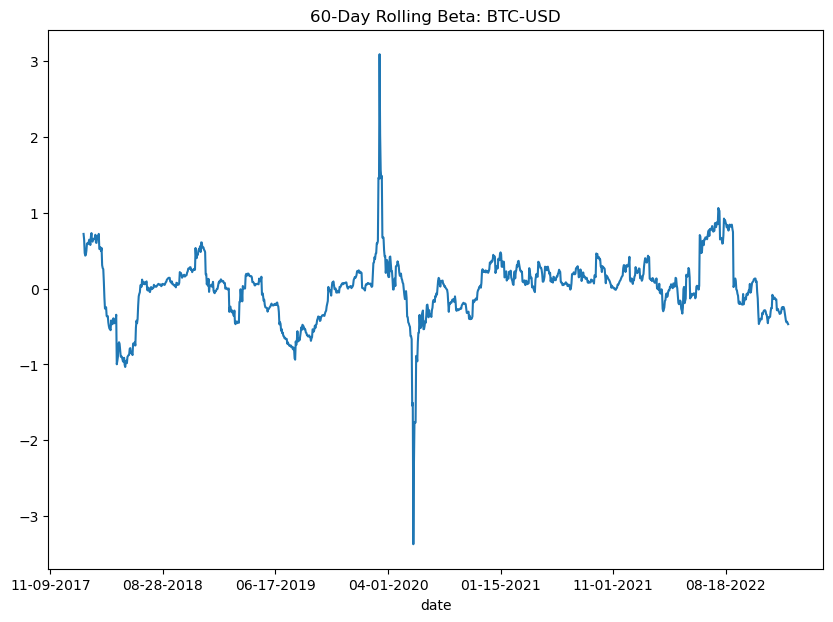

In [43]:
# Ploting the rolling beta 
beta.plot(figsize=(10,7), title="60-Day Rolling Beta: BTC-USD")

In [44]:
#the covariance using a 60-day rolling window 
covariance_1 = daily_returns['BTC-USD'].rolling(window=60).cov(daily_returns["SPY"])
covariance_1.tail()


date
01-23-2023   -0.000076
01-24-2023   -0.000080
01-25-2023   -0.000078
01-26-2023   -0.000082
01-27-2023   -0.000084
dtype: float64

In [45]:
# the beta based on the 60-day rolling covariance compared to the market (S&P 500)
beta_1 = covariance_1/sp_variance
beta_1.tail()


date
01-23-2023   -0.420401
01-24-2023   -0.444078
01-25-2023   -0.436343
01-26-2023   -0.454877
01-27-2023   -0.469576
dtype: float64

In [46]:
# the average of the 60-day rolling beta
beta_1.mean()


0.007418775878169668

<AxesSubplot:title={'center':'60-Day Rolling Beta: BTC-USD'}, xlabel='date'>

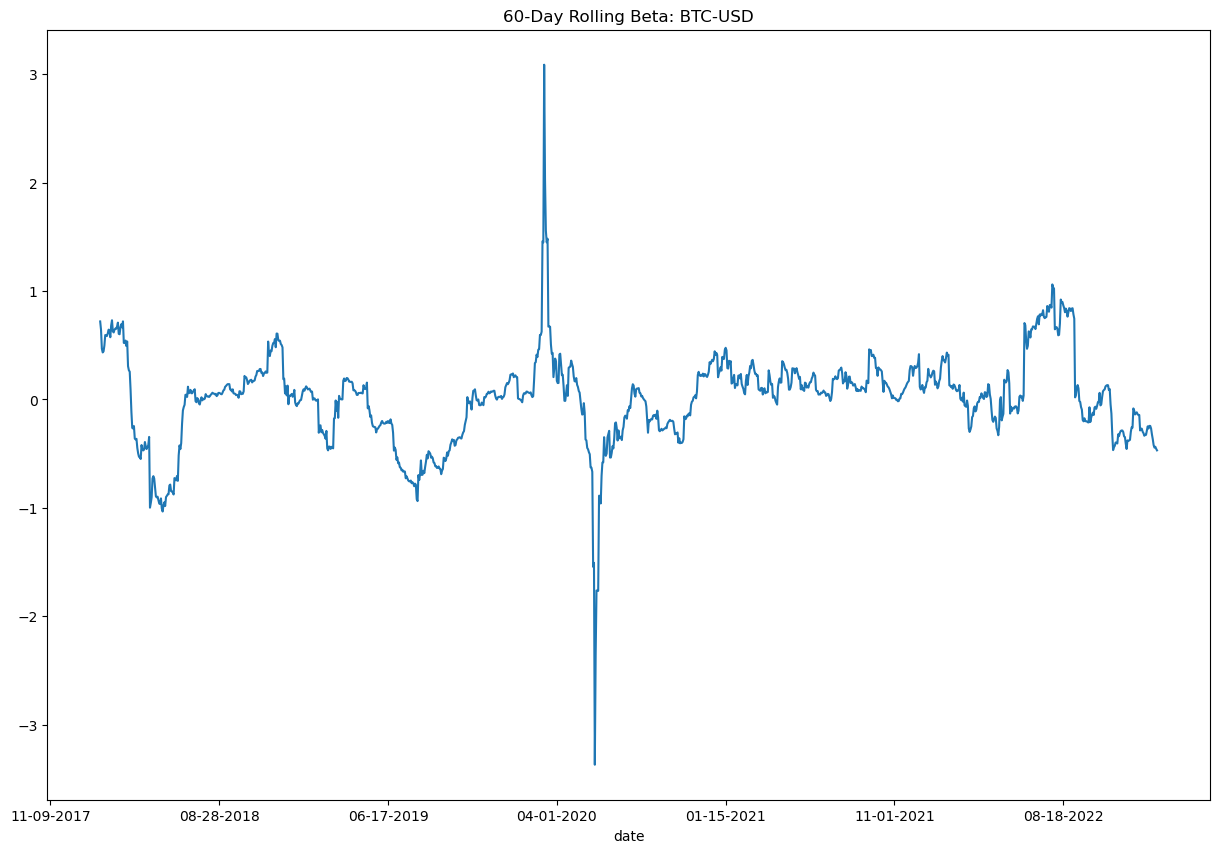

In [47]:
# Ploting the rolling beta 
beta_1.plot(figsize=(15,10), title="60-Day Rolling Beta: BTC-USD")


Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** 


Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** 

---